In [48]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

plt.rcParams["font.family"] = "Helvetica"

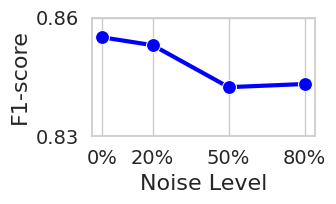

In [93]:
# Data
noise_results = {
    0: 0.855,
    0.2: 0.853,
    0.5: 0.8424,
    0.8: 0.8432
}

# Convert x-axis values to labels
x_labels = ["0%", "20%", "50%", "80%"]
x_values = list(noise_results.keys())
y_values = list(noise_results.values())

# Seaborn style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(3.5, 2.2))  # Set figure size
ax = sns.lineplot(
    x=x_values, 
    y=y_values, 
    marker='o', 
    color='blue', 
    linewidth=3, 
    markersize=10
)

# Set x-axis tick labels
plt.xticks(ticks=x_values, labels=x_labels, fontsize=14)

# Set y-axis limits
plt.ylim(0.83, 0.86)

# Set custom y-ticks (only 0.8 and 0.9)
plt.yticks([0.83, 0.86], labels=["0.83", "0.86"], fontsize=14)

# Labels and title with bigger font size
plt.xlabel("Noise Level", fontsize=16)
plt.ylabel("F1-score", fontsize=16)

# # Remove vertical grid lines while keeping horizontal grid lines
# plt.grid(axis='x', linestyle="")

# # Make outer borders black
# ax.spines["top"].set_color("black")
# ax.spines["right"].set_color("black")
# ax.spines["left"].set_color("black")
# ax.spines["bottom"].set_color("black")

# Show the plot
out = os.path.join("sensys_pdfs", "noise_sensitivity.pdf")
os.makedirs(os.path.dirname(out), exist_ok=True)
plt.savefig(out, bbox_inches='tight')
plt.tight_layout()
plt.show()

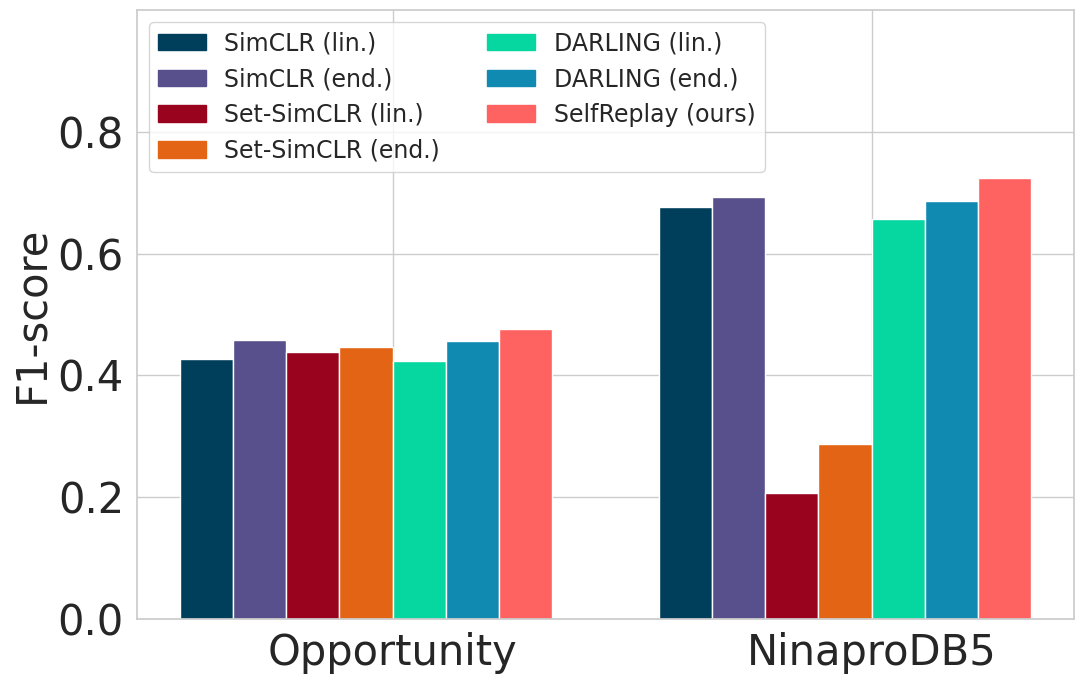

In [112]:
opportunity_data = {
    "SimCLR (lin.)": 0.4268,
    "SimCLR (end.)":  0.458,
    "Set-SimCLR (lin.)": 0.438,
    "Set-SimCLR (end.)": 0.446,
    "DARLING (lin.)": 0.424,
    "DARLING (end.)": 0.456,
    "SelfReplay (ours)": 0.4756,
}

ninapro_data = {
    "SimCLR (lin.)": 0.6763333333,
    "SimCLR (end.)": 0.693,
    "Set-SimCLR (lin.)": 0.2063333333,
    "Set-SimCLR (end.)": 0.2866666667,
    "DARLING (lin.)": 0.6566666667,
    "DARLING (end.)": 0.6856666667,
    "SelfReplay (ours)": 0.724,
}

fig, ax = plt.subplots(figsize=(11, 7))
width = 0.2  # Width of each bar
x = np.arange(2)*1.8

colors = {
    "SimCLR (lin.)": "#003f5c",
    "SimCLR (end.)": "#58508d",
    "Set-SimCLR (lin.)": "#9a031e",
    "Set-SimCLR (end.)": "#e36414",
    "DARLING (lin.)": "#06d6a0",
    "DARLING (end.)": "#118ab2",
    "SelfReplay (ours)": "#ff6361"
}

legend_handles = []  # Custom legend handles
legend_labels = []   # Custom legend labels

xtick_locs = []
for i, dataset in enumerate(["Opportunity", "NinaproDB5"]):
    data = opportunity_data if dataset == "Opportunity" else ninapro_data
    for j, (k, v) in enumerate(data.items()):
        bars = ax.bar(x[i] + width * j, v, width, label=f"Method: {k}",
                      color=colors[k])
    xtick_locs.append(x[i] + width * 3.5)
ax.set_xticks(xtick_locs)
# set x-axis labels
ax.set_xticklabels(["Opportunity", "NinaproDB5"])
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)
for method in colors.keys():
    legend_handles.append(Patch(color=colors[method], label=method))
    legend_labels.append(method)
ax.legend(handles=legend_handles, labels=legend_labels, loc='upper left', ncols=2, fontsize=17)
# set y limit from 0 to 1
ax.set_ylim(0, 1)
# set ylabel not to show 1
ax.set_yticks(np.arange(0, 1, 0.2))
ax.set_ylabel("F1-score", fontsize=30)

out = os.path.join("sensys_pdfs", "opportunity_ninapro.pdf")
os.makedirs(os.path.dirname(out), exist_ok=True)
plt.savefig(out, bbox_inches='tight')

plt.tight_layout()
plt.show()

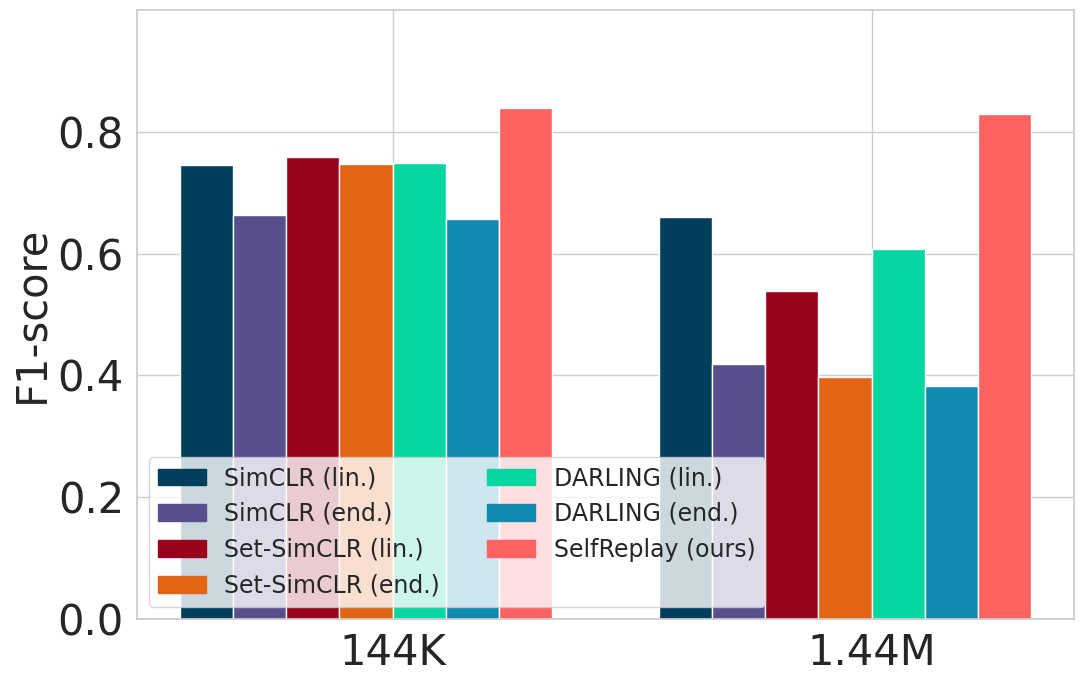

In [111]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.patches import Patch

# Updated model values
small_model = {
    "SimCLR (lin.)": 0.745,
    "SimCLR (end.)": 0.663,
    "Set-SimCLR (lin.)": 0.758,
    "Set-SimCLR (end.)": 0.747,
    "DARLING (lin.)": 0.749,
    "DARLING (end.)": 0.656,
    "SelfReplay (ours)": 0.839,
}

large_model = {
    "SimCLR (lin.)": 0.6594,
    "SimCLR (end.)": 0.4186,
    "Set-SimCLR (lin.)": 0.5382,
    "Set-SimCLR (end.)": 0.3968,
    "DARLING (lin.)": 0.6082,
    "DARLING (end.)": 0.3832,
    "SelfReplay (ours)": 0.8286,
}

# Parameter values (formatted for better readability)
num_params = ["144K", "1.44M"]

# Define colors
colors = {
    "SimCLR (lin.)": "#003f5c",
    "SimCLR (end.)": "#58508d",
    "Set-SimCLR (lin.)": "#9a031e",
    "Set-SimCLR (end.)": "#e36414",
    "DARLING (lin.)": "#06d6a0",
    "DARLING (end.)": "#118ab2",
    "SelfReplay (ours)": "#ff6361"
}

# Create figure and axis
fig, ax = plt.subplots(figsize=(11, 7))
width = 0.2  # Width of each bar
x = np.arange(2) * 1.8  # Spacing for small and large models

# Custom legend handles and labels
legend_handles = []
legend_labels = []
xtick_locs = []

# Plot bars for each model
for i, model in enumerate(["Small", "Large"]):
    data = small_model if model == "Small" else large_model
    for j, (method, value) in enumerate(data.items()):
        bars = ax.bar(x[i] + width * j, value, width, color=colors[method])

    xtick_locs.append(x[i] + width * 3.5)
    # ax.text(x[i] + width * 3.5, 0.01, num_params[i], ha='center', fontsize=17)

# Set x-axis labels as "Number of Parameters"
ax.set_xticks(xtick_locs)
ax.set_xticklabels(num_params, fontsize=30)
# ax.set_xlabel("Number of Parameters", fontsize=30)

# Customize y-axis
ax.set_ylim(0, 1)
ax.set_yticks(np.arange(0, 1, 0.2))
ax.tick_params(axis='y', labelsize=30)
ax.set_ylabel("F1-score", fontsize=30)

# Add legend
for method in colors.keys():
    legend_handles.append(Patch(color=colors[method], label=method))
    legend_labels.append(method)
ax.legend(handles=legend_handles, labels=legend_labels, loc='lower left', ncols=2, fontsize=17)

# Save the figure
out = os.path.join("sensys_pdfs", "small_large.pdf")
os.makedirs(os.path.dirname(out), exist_ok=True)
plt.savefig(out, bbox_inches='tight')

# Show the plot
plt.tight_layout()
plt.show()